In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
from collections import namedtuple, defaultdict
from paper_sims_util import MCC
from running_wrappers import get_loaders
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
LOADERS = get_loaders()
AlgoParams = namedtuple('AlgoParams', 'stability_samples M pi')
GraphParams = namedtuple('GraphParams', 'N eta p d ratios')
import pandas as pd

In [2]:
print('hi')

hi


In [ ]:
#S-H calculation

# total trials: 50
# for each graph, run MTP2 N_SAMPLE times at 10 seconds each
# graphs, parameters
#for each graph, run MTP2 N_SAMPLES times, (10 seconds)
10 seconds * N_samples * # graphs 
#graphs = 4 * 4 = 16 * trials per graph

In [3]:
run_name = 'DO_p_100_slashedp'
run_ids = range(20)
with open("{}_algo_params.pkl".format(run_name), 'rb') as f:
    algo_params = pickle.load(f)
with open("{}_graph_params_dict.pkl".format(run_name), 'rb') as f:
    graph_params_dict = pickle.load(f)
# graph_params_dict = {
#     'chain': GraphParams(p=20, N=[20, 25, 30, 35, 40], eta=1, ratios=None, d=None), #p, N, eta
#     'star': GraphParams(p=20, d=[10, 15, 20, 25, 30], N=50, eta=1, ratios=None), #p, d, N, eta
#     'random': GraphParams(p=20, d=0.01, ratios=[r/500. for r in [300, 375, 500, 750, 1000]], eta=1, N=None), #p, d, ratio over 500, eta
#     'grid_3D': GraphParams(p=2, ratios=[0.5, 0.85, 1., 1.25, 1.5, 2], eta=2, N=None, d=None), #p, ratio over 524, eta
#     'grid': GraphParams(p=7, ratios=[0.5, 0.85, 1., 1.25, 1.5, 2], eta=2, N=None, d=None) #p, ratio over 529, eta
# }

In [4]:
def get_points(loaded_data):
    points = defaultdict(lambda: defaultdict(list))
    for x_label, trials in loaded_data.items(): #x_;
        #print(x_label)
        for trial in trials:
            #print(type(trial))
#             if type(trial) != dict:
#                 continue
            #print(x_label)
            #print(trials.keys())
            omega = trial[0]
            #print(np.sum(omega))
            results = trial[1]
            for algo_name, algo_results in results.items():
                omega_hat = algo_results[0]
                #print(algo_name, np.sum(omega_hat))
                algo_mcc = MCC(omega_hat, omega)
                points[algo_name][x_label].append(algo_mcc)
    return points

In [5]:
def plot_lines(d):
    lines = defaultdict(list)
    x_labels = list(next(iter(d.values())).keys())
    for algo_name, x_label_to_trials in d.items():
        for x_label in x_labels:
            trial_MCCs = x_label_to_trials[x_label]
            lines[algo_name].append(np.mean(trial_MCCs))
    return x_labels, lines

In [6]:
def plot(graph_type, ret = False):
    loaded_data = LOADERS[graph_type](graph_params_dict[graph_type], 
                                  algo_params, 
                                  run_name,
                                  run_ids)
    points = get_points(loaded_data)
    lines = plot_lines(points)
    if ret:
        return points, lines
    for algo, line in lines[1].items():
        plt.plot(lines[0], line, label=algo)
    plt.title(graph_type)
    plt.legend()
    plt.show()

In [45]:
graph_type = 'grid'
try:
    with open('{}_{}_points_lines.pkl'.format(run_name, graph_type), 'rb') as f:
        points,lines = pickle.load(f)
    with open('{}_{}_lines_extra.pkl'.format(run_name, graph_type), 'rb') as f:
        extra = pickle.load(f)
except:
    points, lines = plot(graph_type, True)
    with open('{}_{}_points_lines.pkl'.format(run_name, graph_type), 'wb') as f:
        pickle.dump((dict(points),lines), f)

In [34]:
from final_algo import SH_lambda_wrapper, new_algo
from paper_sims_util import grid_graph
graph = grid_graph(10)
sh_lambdas = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
lambdas_to_res = defaultdict(list)
for N in [25,50,100,200]:
    X = np.random.multivariate_normal(np.zeros(100), np.linalg.inv(graph), N)
    sh_res, _ = SH_lambda_wrapper(X, sh_lambdas)
    for lamb, omega_hat in sh_res.items():
        mcc = MCC(omega_hat, graph)
        lambdas_to_res[lamb].append(mcc)
    omega_hat = new_algo(X, 0.85)
    print(lambdas_to_res)

defaultdict(<class 'list'>, {0.7: [0.428913021387136], 0.75: [0.4208509428142301], 0.8: [0.42588141500945553], 0.85: [0.41519983377877107], 0.9: [0.40547859416899934], 0.95: [0.4005406312292922]})
defaultdict(<class 'list'>, {0.7: [0.428913021387136, 0.5584326449638018], 0.75: [0.4208509428142301, 0.5496201107497449], 0.8: [0.42588141500945553, 0.5333733775491569], 0.85: [0.41519983377877107, 0.5193767705086225], 0.9: [0.40547859416899934, 0.5103550370988045], 0.95: [0.4005406312292922, 0.5058781482426429]})
defaultdict(<class 'list'>, {0.7: [0.428913021387136, 0.5584326449638018, 0.6615594070242867], 0.75: [0.4208509428142301, 0.5496201107497449, 0.6411061012823853], 0.8: [0.42588141500945553, 0.5333733775491569, 0.617976107540797], 0.85: [0.41519983377877107, 0.5193767705086225, 0.6022102363581127], 0.9: [0.40547859416899934, 0.5103550370988045, 0.5827174343400723], 0.95: [0.4005406312292922, 0.5058781482426429, 0.5660642981882388]})
defaultdict(<class 'list'>, {0.7: [0.4289130213871

In [27]:
from paper_sims_util import grid_graph
from final_algo import new_algo
graph = grid_graph(10)
res = []
for N in [25, 50, 100, 200]:
    X = np.random.multivariate_normal(np.zeros(100), np.linalg.inv(graph), N)
    omega_hat = new_algo(X, 0.85)
    mcc = MCC(omega_hat, graph)
    print(mcc)
    res.append(mcc)

Running new algorithm
N=25, M=15
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
0.1993789695964317
Running new algorithm
N=50, M=27
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
0.4340418565282448
Running new algorithm
N=100, M=50
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
0.6994829819533103
Running new algorithm
N=200, M=90
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
0.9005862480940345


In [77]:
tups = []
for algo_name in lines[1].keys():
    for t in zip(lines[0], lines[1][algo_name]):
        tups.append((algo_name,) + t)

In [78]:
df = pd.DataFrame(tups, columns = ['Algorithm', 'N', 'MCC'])

In [79]:
df.Algorithm.unique()

array(['our', 'glasso', 'nbsel', 'anand', 'SH_0.7', 'our_0.85',
       'SH_stability'], dtype=object)

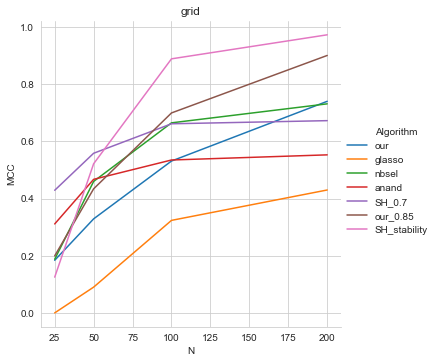

In [80]:
sns.set_style('whitegrid')
g = sns.relplot(x='N', y='MCC', data = df, kind='line', 
            hue='Algorithm',
            #markers=['.', 'v', 'o', '^', '<', '>', '1', '2', '3'],
                #style='Algorithm',
               )
g.fig.get_axes()[0].set_title(graph_type)
g.fig.savefig('images/{}_{}.png'.format(run_name, graph_type))

In [272]:
g.set_xticklabels([lines[0]])

In [273]:
sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

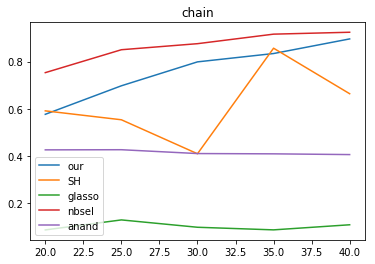

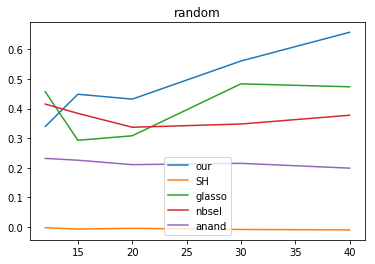

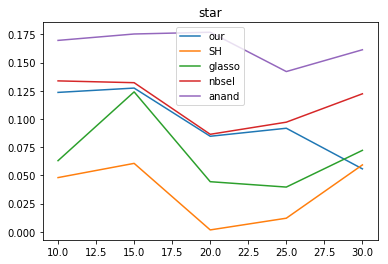

In [214]:
for graph_type in ['chain', 'random', 'star']:
    plot(graph_type)

In [241]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
